### 1 逻辑回归
在训练的初试阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。
设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。

#### 1.1 数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


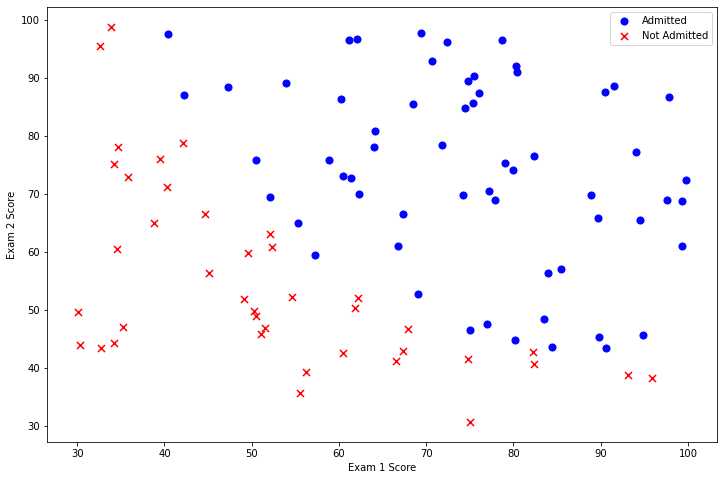

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

#### 1.2 实现

##### 1.2.1 sigmoid函数

逻辑回归函数为 

$$
h_{\theta}=g(\theta^Tx)
$$

g代表一个常用的逻辑函数为S型函数，公式为：

$$
g(z)=\frac{1}{1+e^{-z}}
$$

合起来，我们得到逻辑回归模型的假设函数：

$$
h_{\theta}(x)=\frac{1}{1+e^{-\theta^Tx}}
$$

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##### 1.2.2 代价函数和梯度

代价函数：

$$
J(\theta) = \frac{1}{m} \sum^m_{i=1}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x_{(i)}))]
$$

梯度：

$$
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j
$$

In [8]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

初始化 $X,y,\theta$

In [6]:
data.insert(0, "Ones", 1)

cols = data.shape[1]
X = data.iloc[:, 0: cols-1]
y = data.iloc[:, cols-1: cols]
theta = np.zeros(3)

X = np.array(X.values)
y = np.array(y.values)

X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [9]:
cost(theta, X, y)

0.6931471805599453

In [12]:
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [15]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

##### 1.2.3 用工具库计算$\theta$的值

In [16]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [19]:
cost(result[0], X, y)

0.20349770158947425

画出决策曲线

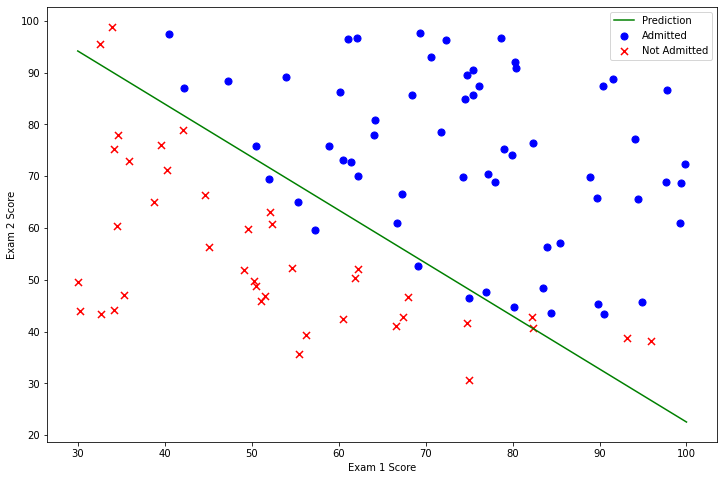

In [22]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = (-result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(plotting_x1, plotting_h1, 'g', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

##### 1.2.4 评价逻辑回归模型

在确定参数之后，我们可以使用这个模型来预测学生是否录取。如果一个学生exam1得分45，exam2得分85。

In [23]:
def hfunc1(theta, X):
    return sigmoid(np.dot(theta.T, X))
hfunc1(result[0], [1, 45, 85])

0.776290625526598

另一种评价$\theta$的方法是看模型在训练集上的正确率怎样。写一个predict的函数，给出数据以及参数后，会返回"1"或者"0"。然后再把这个predict函数用于训练集上，看准确率怎样。

In [24]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [31]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%
